In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cleaning
# changing data types
# adding suffixes to column data, basically manual one hot encoding
pd.options.mode.chained_assignment = None
df = pd.read_csv('processed.cleveland.data')

df = df.replace('?', np.nan)
df = df.dropna()

#df['ca'] = df['ca'].astype(float)
#df['chol'] = df['chol'].astype(float)
#df['age'] = df['age'].astype(float)
#df['thalach'] = df['thalach'].astype(float)
#df['trestbps'] = df['trestbps'].astype(float)

df['ca'] = pd.to_numeric(df['ca']).astype(int)
df['chol'] = pd.to_numeric(df['chol']).astype(int)
df['age'] = pd.to_numeric(df['age']).astype(int)
df['thalach'] = pd.to_numeric(df['thalach']).astype(int)
df['trestbps'] = pd.to_numeric(df['trestbps']).astype(int)

df['sex'][df['sex'] == 0] = 'F'
df['sex'][df['sex'] == 1.0] = 'M'
df['sex'].astype(object)

df['cp'][df['cp'] == 1] = 'typical angina'
df['cp'][df['cp'] == 2] = 'atypical angina'
df['cp'][df['cp'] == 3] = 'non-anginal pain'
df['cp'][df['cp'] == 4] = 'asymptomatic'
df['cp'].astype(object)

df['thal'][df['thal'] == '3.0'] = 'normal'
df['thal'][df['thal'] == '6.0'] = 'fixed defect'
df['thal'][df['thal'] == '7.0'] = 'reversable defect'
df['thal'].astype(object)

df['fbs'][df['fbs'] == 0] = '< 120mg/ml'
df['fbs'][df['fbs'] == 1] = '> 120mg/ml'

df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'

df['target'] = df['target'].replace([2,3,4],1)
df['target'] = df['target'].astype(int)

df['slope'][df['slope'] == 1.0] = 'up'
df['slope'][df['slope'] == 2.0] = 'flat'
df['slope'][df['slope'] == 3.0] = 'down'
df['slope'].astype(object)

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'
df['restecg'].astype(object)


0      left ventricular hypertrophy
1      left ventricular hypertrophy
2      left ventricular hypertrophy
3                            normal
4      left ventricular hypertrophy
5                            normal
6      left ventricular hypertrophy
7                            normal
8      left ventricular hypertrophy
9      left ventricular hypertrophy
10                           normal
11     left ventricular hypertrophy
12     left ventricular hypertrophy
13                           normal
14                           normal
15                           normal
16                           normal
17                           normal
18                           normal
19                           normal
20     left ventricular hypertrophy
21     left ventricular hypertrophy
22     left ventricular hypertrophy
23     left ventricular hypertrophy
24     left ventricular hypertrophy
25                           normal
26                           normal
27                          

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null object
cp          297 non-null object
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null object
restecg     297 non-null object
thalach     297 non-null int64
exang       297 non-null object
oldpeak     297 non-null float64
slope       297 non-null object
ca          297 non-null int64
thal        297 non-null object
target      297 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 34.8+ KB


In [4]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,typical angina,145,233,> 120mg/ml,left ventricular hypertrophy,150,no,2.3,down,0,fixed defect,0
1,67,M,asymptomatic,160,286,< 120mg/ml,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,1
2,67,M,asymptomatic,120,229,< 120mg/ml,left ventricular hypertrophy,129,yes,2.6,flat,2,reversable defect,1
3,37,M,non-anginal pain,130,250,< 120mg/ml,normal,187,no,3.5,down,0,normal,0
4,41,F,atypical angina,130,204,< 120mg/ml,left ventricular hypertrophy,172,no,1.4,up,0,normal,0
5,56,M,atypical angina,120,236,< 120mg/ml,normal,178,no,0.8,up,0,normal,0
6,62,F,asymptomatic,140,268,< 120mg/ml,left ventricular hypertrophy,160,no,3.6,down,2,normal,1
7,57,F,asymptomatic,120,354,< 120mg/ml,normal,163,yes,0.6,up,0,normal,0
8,63,M,asymptomatic,130,254,< 120mg/ml,left ventricular hypertrophy,147,no,1.4,flat,1,reversable defect,1
9,53,M,asymptomatic,140,203,> 120mg/ml,left ventricular hypertrophy,155,yes,3.1,down,0,reversable defect,1


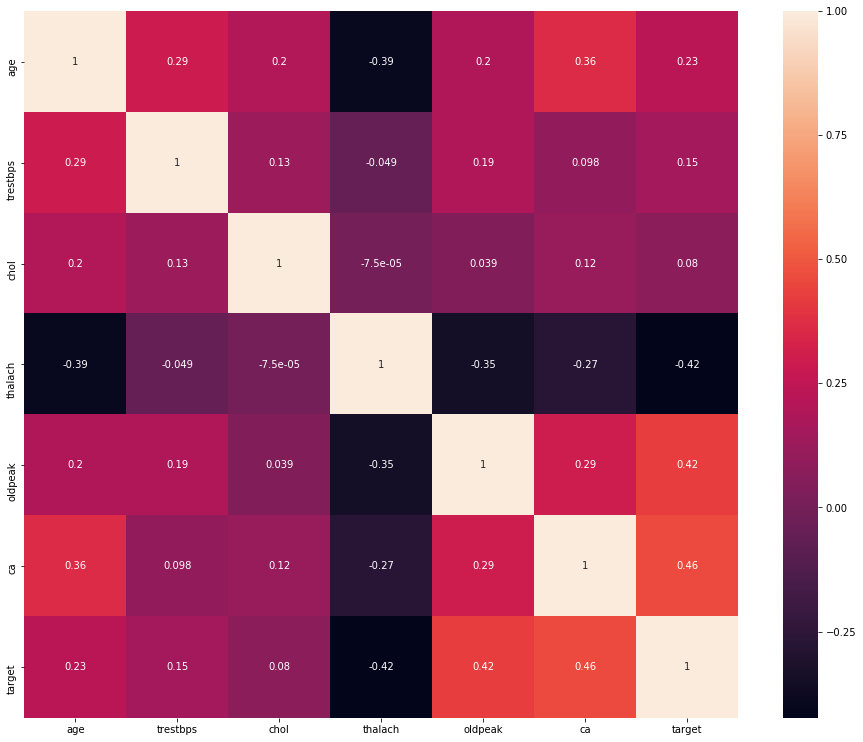

In [5]:
plt.figure(figsize=(16,13))
sns.heatmap(df.corr(),annot=True)

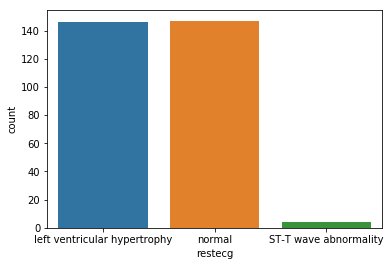

In [6]:
sns.countplot(df['restecg'])
# This does not match the Kaggle dataset. restecg in the kaggle dataset have the 1.0 and 2.0 swapped around below

In [7]:
# PLA & Clustering [ Coming Soon ]

In [8]:
# RFC
# https://stackoverflow.com/questions/20463281/how-do-i-solve-overfitting-in-random-forest-of-python-sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #for the model

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

# Split categorical data
df = pd.get_dummies(df, drop_first=True)

# Split Training & Test Set 80-20
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10)

In [9]:
#df.head()

In [10]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(max_depth=4,n_estimators=100)
#print("Training Cross Val Score: {}".format(cross_val_score(rf, X_train, y_train, cv=10)))
rf.fit(X_train, y_train)

# http://jmlr.csail.mit.edu/papers/v11/cawley10a.html
#print("Training Cross Val Score: {}".format(cross_val_score(rf, X_train, y_train, cv=10)))
#print("Test Cross Val Score: {}".format(cross_val_score(rf, X_test, y_test, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

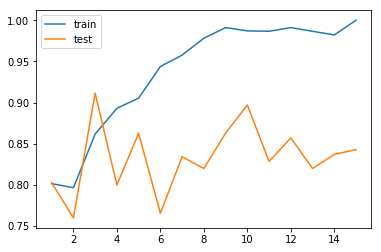

In [11]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
# https://arxiv.org/abs/1705.05654

# Why max_depth = 4 is best
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   x_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, x_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, label='train')
line2, = plt.plot(max_depths, test_results, label='test')
plt.legend(loc='upper left')
plt.show()

In [12]:
print("Train: {}".format(accuracy_score(y_train, x_pred)))
print("Test: {}".format(accuracy_score(y_test, y_pred)))

Train: 1.0
Test: 0.85


In [13]:
mean_squared_error(y_test,y_pred)

0.15

In [14]:
c = confusion_matrix(y_test,y_pred)
print(c)

[[31  4]
 [ 5 20]]


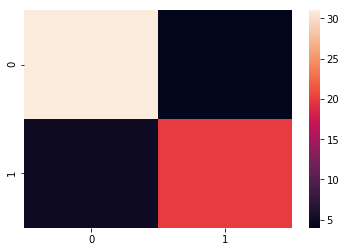

In [15]:
sns.heatmap(c)

In [16]:
# https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
# Finding out which features influence target

perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.explain_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1133 ± 0.0490,ca
0.0500 ± 0.0422,thal_reversable defect
0.0300 ± 0.0490,thalach
0.0233 ± 0.0267,thal_normal
0.0167 ± 0.0422,chol
0.0167 ± 0.0211,restecg_normal
0.0167 ± 0.0211,sex_M
0.0100 ± 0.0340,oldpeak
0.0067 ± 0.0163,cp_atypical angina
0.0033 ± 0.0133,cp_non-anginal pain
